In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 1. Introduction

In this project, I am going to explore the NYC AirBnb dataset through visualization and try to engineer multiple features to optimze them for our machine learning models so that the price of the AirBnb properties can be predicted quite accurately.

## 1.1 Data source
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

### Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

### Content
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

### Acknowledgements
This public dataset is part of Airbnb, and the original source can be found on this website: http://insideairbnb.com/

## 1.2 Data definitions
id: listing ID  
name: name of the listing  
host_id: host ID  
host_name: name of the host  
neighbourhood_group: location  
neighbourhood: area  
latitude: latitude coordinates  
longitude: longitude coordinates  
room_type: listing space type  
price: price in dollars  
minimum_nights: amount of nights minimum  
number_of_reviews: number of reviews  
last_review: latest review  
reviews_per_month: number of reviews per month  
calculated_host_listings_count : amount of listing per host  
availability_365: number of days when listing is available for booking  

# 2. EDA

Let's explore our data! First up, data loading

## 2.1 Data loading and understanding

In [72]:
df=pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

Let's quickly look at the data.

In [73]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Ah I can see the NaN values in some columns already. Let's take a look at the dataframe info.

In [74]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

From this we can see that we have 48,895 entries and 16 columns but some columns (name, host_name, etc) have less non-null values which means there are NaN values.

Let's generate descriptive statistics for our dataframe.

In [75]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,48895,NaN,NaN,NaN,1.90171e+07,1.09831e+07,2539,9.47194e+06,1.96773e+07,2.91522e+07,3.64872e+07
name,48879,47905,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48895,NaN,NaN,NaN,6.762e+07,7.8611e+07,2438,7.82203e+06,3.07938e+07,1.07434e+08,2.74321e+08
host_name,48874,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895,NaN,NaN,NaN,40.7289,0.0545301,40.4998,40.6901,40.7231,40.7631,40.9131
longitude,48895,NaN,NaN,NaN,-73.9522,0.0461567,-74.2444,-73.9831,-73.9557,-73.9363,-73.713
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895,NaN,NaN,NaN,152.721,240.154,0,69,106,175,10000


Let's foucs on the price information as that is going to be our target. I did not know that there are some $0 AirBnB (look at the min of price column). Also there is a \\$10,000 AirBnB! Something to note is the mean of the price, \\$152.

## 2.2  Data visualization - Part 1

Ok. Now let's look at some plots to visually understand our data. It seems we have latitude and longitude data, meaning we can generate a 'map' for the prices. I will use a scatter plot to map the prices.

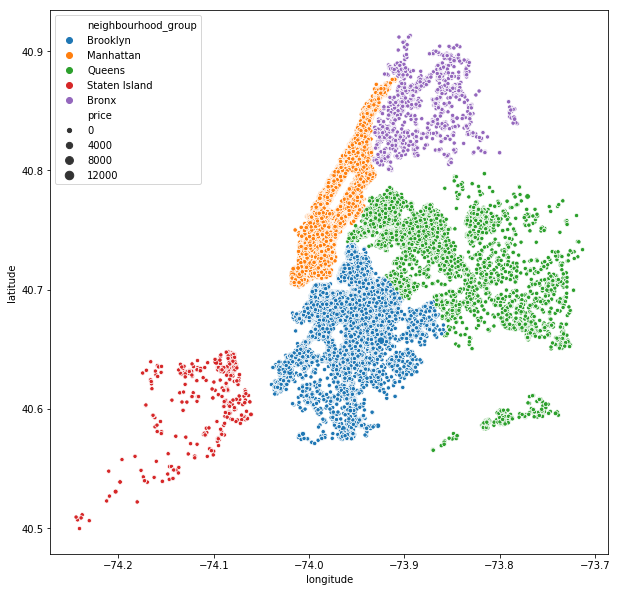

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',size='price', data=df)

In this figure, the colors represent the neighborhoods and the marker sizes represent the price ranges. We can clearly differntiate the neighbourhoods but hard to see the price information. Let's focus on price information only and actually overlay the NYC map on top of this. 

For the overlaying map, I downloaded the shapefiles from https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zmand uploaded them to this direcotry. We will use Geopandas for plotting the shapefile.

In [77]:
# import Geopandas
import geopandas as gpd

# import street map
#street_map = gpd.read_file('/kaggle/input/nyc-shapefile/geo_export_cd000852-2825-4046-9168-5b498fd4c7ca.shp')

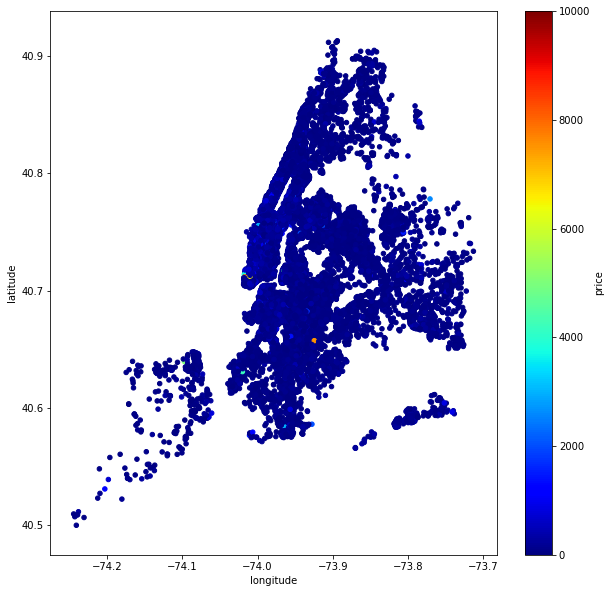

In [78]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(1,1,figsize=(10,10))

#plotting the price as a function of longitude and latitude
g=df.plot(x='longitude',y='latitude', c='price',kind='scatter',cmap='jet',ax=ax,zorder=5)

# add .shp mapfile to axes
#street_map.plot(ax=ax,alpha=0.6,color='black')
plt.show()

This is a cool image but we can see that most of makrers are shown in blue because the outliers (pricey AirBnB's) overwhelemed the rest of data.

### 2.3 Data normalization - log transformation

Let's actually look at the histogram of the prices to see how skewed our dataset is.

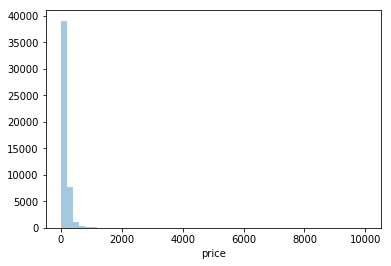

In [79]:
sns.distplot(df['price'],kde = False)
plt.show()

We can see that our data is significantly skewed towards the left. This is why we did not see any details in the price maps above.
Let's correct this by normalizing our dataset. I am going to apply a log scale for normalization.

One thing we need to note though is that since there are some \\$0 price tags in our dataframe, which will cause a problem because log(0) cannot be defined.

To resolve this issue while preserving the dataframe's feature as much as possible, we can add a very small constant to the price column. I will add \\$1 to the price in the dataframe and then apply logarthmic function. This actually does not modify the nature of price dataset too much as log(1) = 0.

In [80]:
#adding a small constant to the price column to prevent log(0) issue and assign a new column
df['log_price'] = np.log(df['price']+1)

Let's replot the histogram after this logarithmic transfomration.

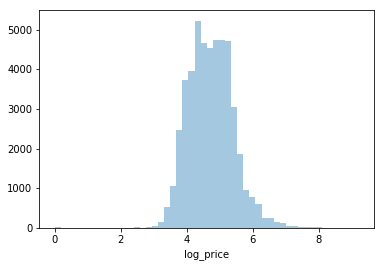

In [81]:
sns.distplot(df['log_price'],kde = False)
plt.show()

Now it looks much more like our typical normal distribution. :) 

However, we have to be careful with logarihmic transformation. Leigh Metcalf et al. said in their "Introduction to data analysis" book published in 2016 that "a process that de-emphasizes them (outliers)is not useful" if we want to analyze the outliers and "if the distance between each variable is important, then taking the log of the variable skews the distance". 

Fortunately, these do not apply to this project so let's replot the price map one more time with log_price.

## 2.4  Data visualization - Part 2

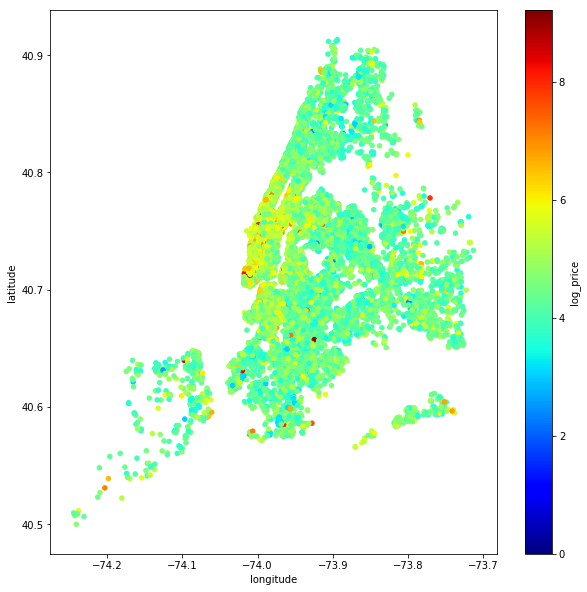

In [82]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(1,1,figsize=(10,10))

#plotting the price as a function of longitude and latitude
df.plot(x='longitude',y='latitude', c='log_price',kind='scatter',cmap='jet',ax=ax,zorder=5)

# add .shp mapfile to axes
#street_map.plot(ax=ax,alpha=0.6,color='black',legend=True)
plt.show()

Now we can clearly see that the most of expensive ones are in the Manhattan island, which is not very surprising.

We can further visualize this by creating Seaborn boxplots for the neighbourhood_group feature.

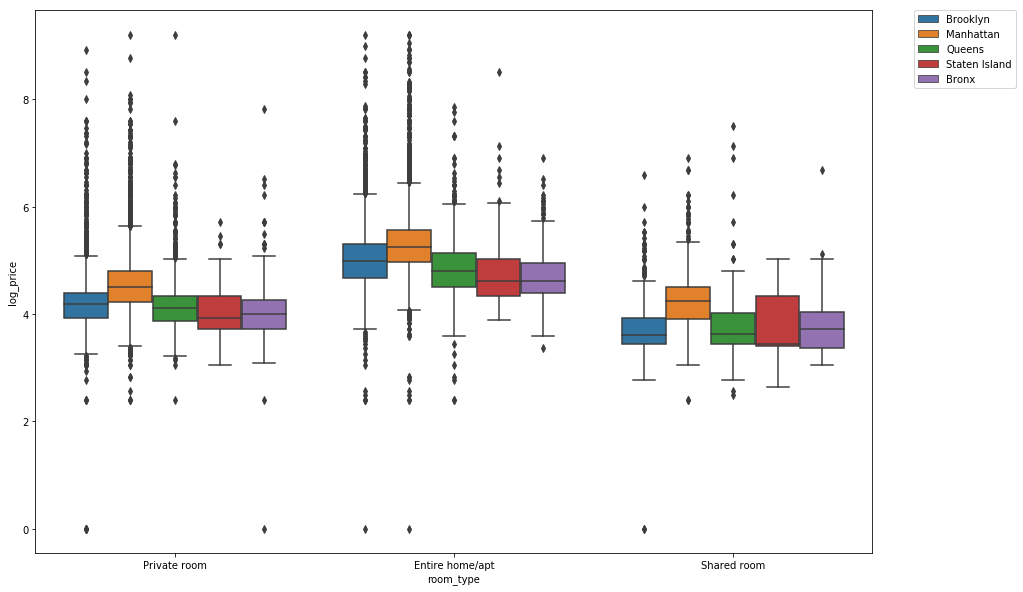

In [83]:
plt.figure(figsize=(15,10))

#utilizing Sebaorn boxplot. Categorizing log_price into neighbourhood_group for differnt room types
sns.boxplot(x="room_type", y="log_price",hue="neighbourhood_group",data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

As we saw in the map plot above, the Manhattan AirBnb prices were higher than the rest of neighborhood's for all types of rooms. What about # of reviews? Would more reviews mean more 'luxurious' ones?

Rather than actually plotting for each number of reviews, I will categorize them into 5 bins using panda's "cut", so that we can quickly visualize this information with Seaborn's catplot.

In [84]:
#creating bins
bins = [-np.inf, 100, 200, 300, 400, np.inf]

#assigning names to each bin
names = ['0 to 100', '100 to 200', '200 to 300', '300 to 500', '500 and above']

#creating a new column containing bin information
df['num_review_cat'] = pd.cut(df['number_of_reviews'], bins, labels=names)

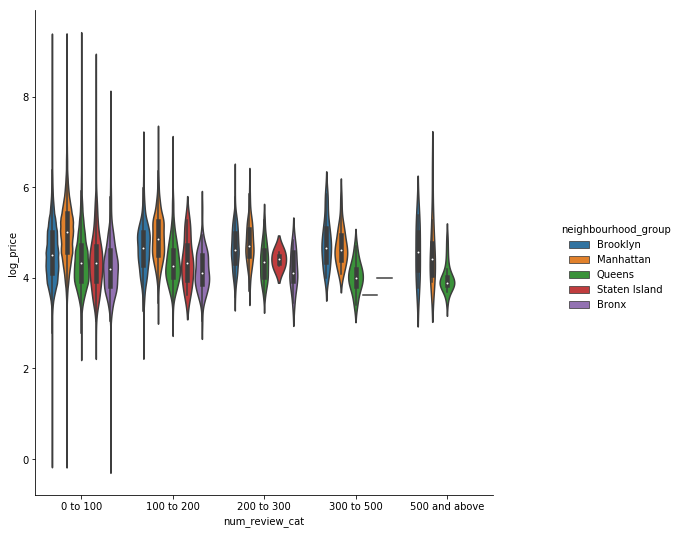

In [85]:
g=sns.catplot(x="num_review_cat", y="log_price", hue="neighbourhood_group", data=df, kind="violin")
g.fig.set_size_inches(10,8)

We can see from the plot above that generally the number of reviews do not affect the prices in all neighbourhoods.

Let's take a look at the correlation plot to see how numerical features are related to our target, the price. I wil ignore the cateogrical attributes for now.

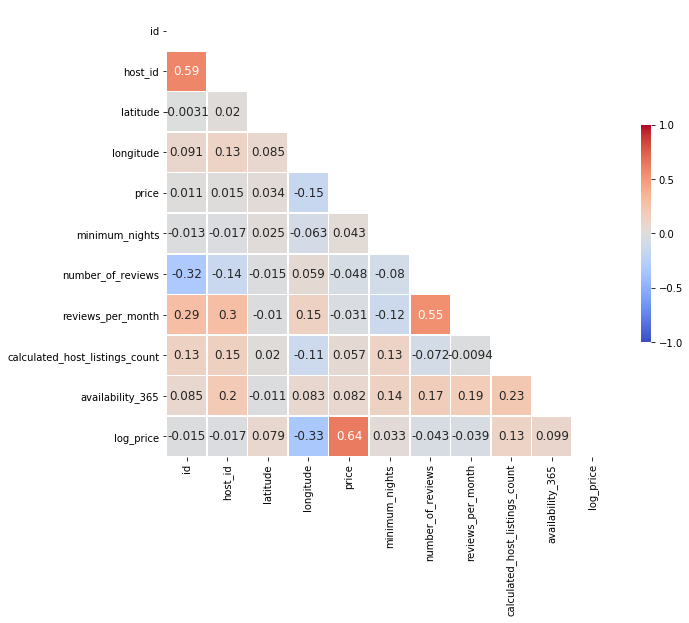

In [86]:
corr_matrix=df.corr()
#creating a mask to block the upper triangle of coorelation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

#plotting correlation
f, ax = plt.subplots(figsize=(10, 10)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

If we focus on the log_price row in the correlation map (last row), we can see that longitude has strong negative correlation. "Price" is essentialy the same as log_price so we can ignore it. Let's take a look at the Seaborn regression plot between the longigute and log_price.

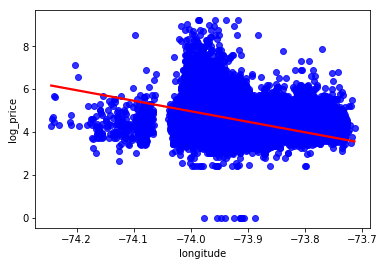

In [87]:
sns.regplot(x='longitude',y='log_price',data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

Ok. Before we jump into feature engineering before modeling, I would also like to see how long the AirBnB listing typically had lasted.

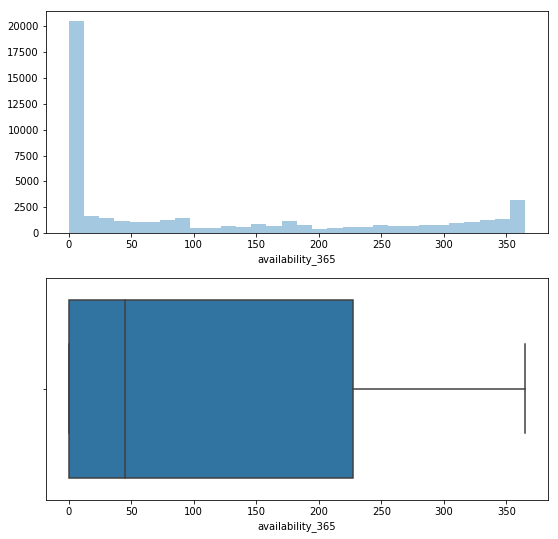

In [88]:
fig,ax=plt.subplots(2,figsize=(9,9))
#Creating a histogram for availablity
sns.distplot(df["availability_365"], kde=False,ax=ax[0])

#Creating a box plot for availablity
sns.boxplot("availability_365",data=df,ax=ax[1])

From this, we can see that the listings stayed available for booking for ~50 days (median), which means most of them did not remain available that long.

Finally, I would like to see what typical words the hosts used when listing. As we saw above the listing names were something descriptive like "Clean&quiet apt home by the park". There might be something interesting to note.

In [89]:
#first making the df['name'] series lower-case. Then, apply 'str.split' to split each sentence in each row by whitespace.
#After that drop any NaN values in the series and then covert the series to a list.

split_name_list=df['name'].str.lower().str.split().dropna().tolist()

In [90]:
#see the first 10 elements in the list
split_name_list[:10]

[['clean', '&', 'quiet', 'apt', 'home', 'by', 'the', 'park'],
 ['skylit', 'midtown', 'castle'],
 ['the', 'village', 'of', 'harlem....new', 'york', '!'],
 ['cozy', 'entire', 'floor', 'of', 'brownstone'],
 ['entire', 'apt:', 'spacious', 'studio/loft', 'by', 'central', 'park'],
 ['large', 'cozy', '1', 'br', 'apartment', 'in', 'midtown', 'east'],
 ['blissartsspace!'],
 ['large', 'furnished', 'room', 'near', "b'way"],
 ['cozy', 'clean', 'guest', 'room', '-', 'family', 'apt'],
 ['cute', '&', 'cozy', 'lower', 'east', 'side', '1', 'bdrm']]

It seems this produced a nested list. Let's flatten this. I used nested list comprehension for this.

In [91]:
flatten_name_list = [val for sublist in split_name_list for val in sublist]

In [92]:
#show the first 10 elements in the flattened list
flatten_name_list[:10]

['clean',
 '&',
 'quiet',
 'apt',
 'home',
 'by',
 'the',
 'park',
 'skylit',
 'midtown']

Ok. Now I want to remove some "stopwords" such as articles (a, the) or connecting words (and, but). The nltk library already has common stopwords defined.

In [93]:
#importing nltk library to use stopwords
import nltk
#need to first download the stopwords using the follwoing link: nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [94]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Ok now let's filter out these stop words from our flatten_name_list. I will use list comprehension again because we eventually need a list to feed into Counter class in Collection module.

In [95]:
filtered_sentence = [w for w in flatten_name_list if not w in stop_words]

In [96]:
#showing the first 10 elements of the filtered element.
filtered_sentence[0:10]

['clean',
 '&',
 'quiet',
 'apt',
 'home',
 'park',
 'skylit',
 'midtown',
 'castle',
 'village']

Ok. Let's use Counter to count the most 10 common words.

{'room': 9389, 'bedroom': 7231, 'private': 6985, 'apartment': 6113, 'cozy': 4634, 'studio': 3772, 'brooklyn': 3629, 'apt': 3571, 'spacious': 3387, '1': 3357}


<BarContainer object of 10 artists>

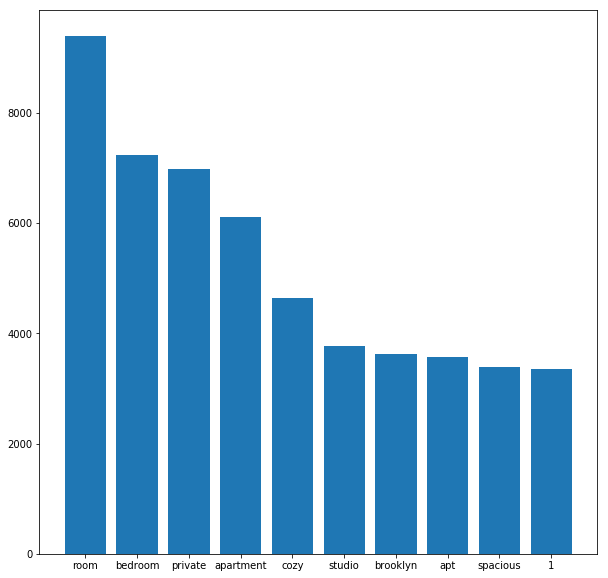

In [97]:
#import counter from collections package
from collections import Counter
c = Counter(filtered_sentence)
most_common_word=c.most_common(10)
print(dict(most_common_word))
plt.figure(figsize=(10,10))
plt.bar(dict(most_common_word).keys(), dict(most_common_word).values())

Not surprisingly, people used 'room' the most in their listings. Something like private or cozy are also noteworthy. Alright, let's move on to fetaure engineering in preparation of our price prediction.

# 3. Feature engineering

Let's take a look at our dataframe one more time.

In [98]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,log_price,num_review_cat
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,5.010635,0 to 100
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5.420535,0 to 100
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,5.017280,0 to 100
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4.499810,200 to 300
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4.394449,0 to 100


We can see that we have some columns that we do not need anymore. For example, the "num_review_cat" was generated by us for easy plotting. Finally, since we decide to use log_price not price, I can simply drop the price column too.

In [99]:
#getting rid of unncessary columns from dataframe
#we are going to use log_price instead of price
df=df.drop(["price","num_review_cat"],axis=1)

Any other additional features to drop? Well the id and host_id are not really required to train our model as they are simply assigned to each property and host arbitrarily.

Also what about something like names (AirBnB listing names)? or the host names? First of all, listing_names should not signicantly affect prices as many people will use attractive words or descriptions. The host_name also should not matter. Also the date when the last_review was created should have a less effect on price thatn the number or the review scores. Let's check on my hypothesis by plotting price as a fucntion of these attributes from the orignal dataframe, df. 

Because it takes quite a while to plot the all ~49,000 records in the original dataset, I will just choose 20% random samples for each category and plot.

In [100]:
#creating a new dataframe for the hypothesis check
new_df=df[['name','host_name','last_review','log_price']]

#melting the dataframe to easily visualize the above mentioned features
#variables: features, values: corresponding value for each feature. id_vars: log_price
new_df_melt=pd.melt(new_df,id_vars=['log_price'])

#sampling 20% records from dataframe
new_dfSample = new_df_melt.sample(int(len(new_df)*0.2))

[[]]

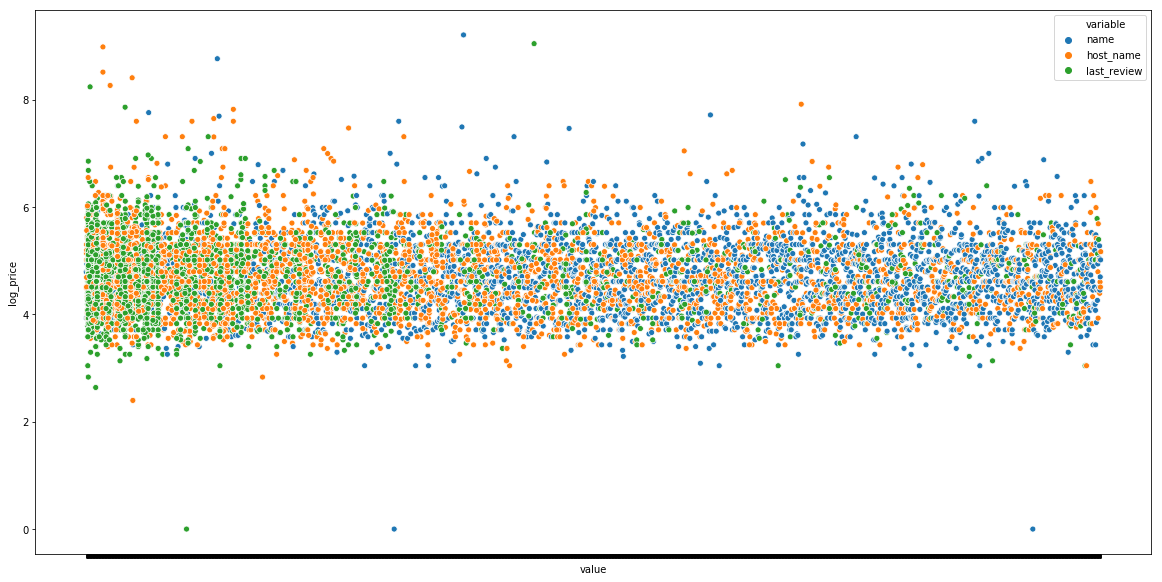

In [101]:
plt.figure(figsize=(20,10))
#creating a scatterplot. Hue is for each variable (feature).
g=sns.scatterplot(x="value", y="log_price", hue="variable",data=new_dfSample)
#not showing any xticklables because they are all different for each feature
g.set(xticklabels=[])

We can see that the names, host names and last_review do not really have a strong effect on prices. Let's drop these attributes altogether for easier machine learning model development.

In [102]:
df=df.drop(["id","host_id","last_review","host_name","name"],axis=1)

Let's take a look at our dataframe to see our work until now.

In [103]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6,365,5.010635
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355,5.420535
2,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,NaN,1,365,5.017280
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194,4.499810
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0,4.394449


The 3rd row of reviews_per_month column is showing a null value, which reminds me again that we need to take care of these missing values for proper modeling. But I prefer to take care of it through sklearn's pipelines after we split train and test datasets. Let's split now before I forget.

In [104]:
#separating labels and predictors
X=df.drop('log_price',axis=1)
y=df['log_price'].values

#splitting train (75%) and test set (25%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [105]:
X_train.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
542,Brooklyn,Bedford-Stuyvesant,40.68497,-73.95592,Entire home/apt,3,207,2.18,1,304
18954,Queens,Edgemere,40.59324,-73.77288,Private room,30,1,0.04,43,354
3852,Brooklyn,Crown Heights,40.67026,-73.92587,Entire home/apt,2,17,0.39,1,0
34822,Manhattan,Washington Heights,40.85268,-73.92716,Entire home/apt,1,42,4.00,1,2
41630,Bronx,Kingsbridge,40.88474,-73.90321,Private room,30,0,NaN,37,0


Now let's separate numerical and categorical attributes to go through different transormation pipelines.

In [106]:
#Selecting numerical dataframe in train set
X_train_num=X_train.select_dtypes(include=np.number)

#Selecting categorical dataframe in train set
X_train_cat=df.select_dtypes(exclude=['number'])

In [107]:
X_train_num.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [108]:
X_train_num.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
542,40.68497,-73.95592,3,207,2.18,1,304
18954,40.59324,-73.77288,30,1,0.04,43,354
3852,40.67026,-73.92587,2,17,0.39,1,0
34822,40.85268,-73.92716,1,42,4.00,1,2
41630,40.88474,-73.90321,30,0,NaN,37,0


In [109]:
X_train_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt


Now I will create pipelines for numerical features basically to fill in the missng values (imputing) and scale the numerical features. For this, I am going to first impute the missing values with a median of each column using sklearn's SimpleImputer and then use MinMaxScaler for feature scaling

In [110]:
#importing necessary modules from sklearn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

#creating a pipeline for numerical attribute. Pipeline: median imputer + MinMaxScaler
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),('mm_scaler',MinMaxScaler()),])

We also have 3 categorical features remaining in our dataframe. For ML regression modeling, we should convert them to numercal values. I can use sklearn's LabelEncoder for this.

In [111]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#applying label encoding for categorical features in train set
X_train_cat=X_train_cat.apply(LabelEncoder().fit_transform)

In [112]:
X_train_cat.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

In [113]:
X_train_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,1,108,1
1,2,127,0
2,2,94,1
3,1,41,0
4,2,61,0


Now we can see the categorical features have been succesfully converted to numerical features. However, these numbers do not really hold 'correct' meaning. For example. the value of 1 (private room) in the room_type feature does not really mean a private room is greater in magintude or degree than 0 (Entire home). For this reason, we need to apply OneHotEncoding to denote that they numerically belong to different classes but without any order or magnitude. I could apply OneHotEncoding to the LabelEncoded features above, but I will rely on sklearn's ColumnTransformer to take care of both numerical and categorical features at the same time through pipelines. Moreover, from scikit-learn 0.20, OneHotEncoder accepts strings, so we don't really need a LabelEncoder before it anymore.

In [114]:
#importing ColumnTransformer and OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#separating numerical and categorical attributes in the train set
num_attribs = list (X_train_num)
cat_attribs = list (X_train_cat)

#creating a full pipeline: numerical + categorical
full_pipeline = ColumnTransformer([("num",num_pipeline,num_attribs),("cat",OneHotEncoder(handle_unknown='ignore'),cat_attribs)])

#fit and transform the train set using the full pipeline
X_train_prepd = full_pipeline.fit_transform(X_train)

In [115]:
X_train_prepd

<36671x234 sparse matrix of type '<class 'numpy.float64'>'
	with 312364 stored elements in Compressed Sparse Row format>

Ok now we are good to go to train our machine learning models.


# 4. Modeling

## 4.1 Linear regression

Let's first try linear regression

In [116]:
#importing linear regression model and mean_squared_error metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#definiing linear regressor
lin_reg=LinearRegression()

#feeding in X_train and y_train for model fitting
lin_reg.fit(X_train_prepd,y_train)

#making predictions on train set
lin_predictions = lin_reg.predict(X_train_prepd)

print("Log_price from Data Set:" )
print(y_train)
print("Log_price from Prediction: ")
print(lin_predictions)

#getting MSE and RMSE values
lin_mse=mean_squared_error(y_train,lin_predictions)
lin_rmse=np.sqrt(lin_mse)

print("Mean squared error: %.3f" % lin_mse)
print("Root mean squared error: %.3f" % lin_rmse)

Log_price from Data Set:
[4.60517019 3.71357207 4.39444915 ... 4.87519732 5.01727984 4.79579055]
Log_price from Prediction: 
[4.9512332  4.14824525 4.72438231 ... 5.39967824 5.27384526 5.00299533]
Mean squared error: 0.225
Root mean squared error: 0.475


This is not super bad given that our log_price mean was ~\\$5.

Let's use cross-validation to check if we are overfitting or not. I will use 10 folds for the decision tree model and get the scores, mean of the scores and standard devaition of the scores.

In [117]:
#importing cross_val_score to perform k-fold validation
from sklearn.model_selection import cross_val_score

#performing 10-fold validation
scores=cross_val_score(lin_reg, X_train_prepd, y_train, scoring = "neg_mean_squared_error",cv=10)

# skleanr's cross validation expect a utility function, so the greater the better. 
# That is why putting a negative sign
lin_rmse_scores=np.sqrt(-scores)
print("Scores:", lin_rmse_scores)
print("Mean: %.3f" % lin_rmse_scores.mean())
print("STD: %.3f" % lin_rmse_scores.std())

Scores: [0.478308   0.45564565 0.48854216 0.48343396 0.46318884 0.47012352
 0.4762709  0.48807469 0.50976893 0.46878451]
Mean: 0.478
STD: 0.015


The mean RMSE in the validation set is about the same as training set, which means we are not overly overfitting. Let's plot the predictions against the actual labels in the training set.

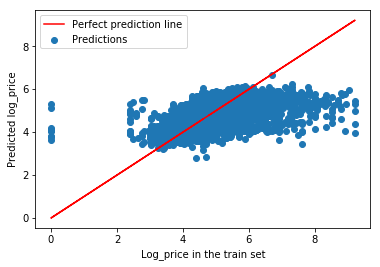

In [118]:
plt.scatter(y_train,lin_predictions, label='Predictions')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')

plt.xlabel("Log_price in the train set")
plt.ylabel("Predicted log_price")
plt.legend()

Not really looking great. We were doing ok with the middle price datasets but not great with the low and high datasets.
Let's skip on modeling the test set with this model as training set itself looks not ideal.

## 4.2 Decision Tree Regression

Let's try DecisionTreeRegressor next. I am not going to use any pruning first.

In [119]:
#importing decision tree model
from sklearn.tree import DecisionTreeRegressor

#defining decision tree regressor
tree_reg=DecisionTreeRegressor()
#feeding X_train and y_train into the regressor
tree_reg.fit(X_train_prepd,y_train)

#making predictions on train set
tree_predictions = tree_reg.predict(X_train_prepd)
print("Log_price from Data Set:" )
print(y_train)
print("Log_price from Prediction: ")
print(tree_predictions)

#getting MSE and RMSE values
tree_mse=mean_squared_error(y_train,tree_predictions)
tree_rmse=np.sqrt(tree_mse)

print("Mean squared error: %.3f" % tree_mse)
print("Root mean squared error: %.3f" % tree_rmse)

Log_price from Data Set:
[4.60517019 3.71357207 4.39444915 ... 4.87519732 5.01727984 4.79579055]
Log_price from Prediction: 
[4.60517019 3.71357207 4.39444915 ... 4.87519732 5.01727984 4.79579055]
Mean squared error: 0.000
Root mean squared error: 0.001


Wow! rmse of almost 0 seems too low. We are clearly overfitting.

Let's use cross-validation to check.

In [120]:
#performing 10-fold validation
scores=cross_val_score(tree_reg, X_train_prepd, y_train, scoring = "neg_mean_squared_error",cv=10)

# skleanr's cross validation expect a utility function, so the greater the better. 
# That is why putting a negative sign
tree_rmse_scores=np.sqrt(-scores)
print("Scores:", tree_rmse_scores)
print("Mean: %.3f" % tree_rmse_scores.mean())
print("STD: %.3f" %  tree_rmse_scores.std())

Scores: [0.60001151 0.6058304  0.61735207 0.6466935  0.61715688 0.61358691
 0.59378038 0.62319922 0.63459622 0.60683513]
Mean: 0.616
STD: 0.015


We can clearly see that the rmse value of training set is much smaller than that of validation set (mean: 0.61), which clearly shows significant overfitting with DecisionTree model. Let'as add some pruning and see how much we can get better.

In [121]:
#adding max_depth of 15 limitation
tree_reg=DecisionTreeRegressor(max_depth=15)
#fitting the train set
tree_reg.fit(X_train_prepd,y_train)

#making predictions
tree_predictions = tree_reg.predict(X_train_prepd)
print("Log_price from Data Set:" )
print(y_train)
print("Log_price from Prediction: ")
print(tree_predictions)

#getting MSE and RMSE values
tree_mse=mean_squared_error(y_train,tree_predictions)
tree_rmse=np.sqrt(tree_mse)

print("Mean squared error: %.3f" % tree_mse)
print("Root mean squared error: %.3f" % tree_rmse)

Log_price from Data Set:
[4.60517019 3.71357207 4.39444915 ... 4.87519732 5.01727984 4.79579055]
Log_price from Prediction: 
[4.94296475 3.71357207 4.65363955 ... 5.10918155 5.21375323 4.97429734]
Mean squared error: 0.098
Root mean squared error: 0.312


In [122]:
#performing 10-fold validation
scores=cross_val_score(tree_reg, X_train_prepd, y_train, scoring = "neg_mean_squared_error",cv=10)

# skleanr's cross validation expect a utility function, so the greater the better. 
# That is why putting a negative sign
tree_rmse_scores=np.sqrt(-scores)
print("Scores:", tree_rmse_scores)
print("Mean: %.3f" % tree_rmse_scores.mean())
print("STD: %.3f" %  tree_rmse_scores.std())

Scores: [0.52483828 0.54430141 0.53984717 0.55907483 0.5400833  0.5320453
 0.52265707 0.54123502 0.55471671 0.54386326]
Mean: 0.540
STD: 0.011


Much better in terms of overfitting when we require the model to stop buildling the trees at the depth of 15. Let's take a look at how our predictions on the training set look like.

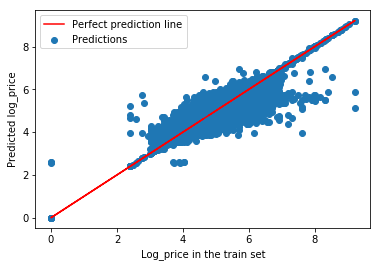

In [123]:
plt.scatter(y_train,tree_predictions, label='Predictions')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.xlabel("Log_price in the train set")
plt.ylabel("Predicted log_price")
plt.legend()

Definitely better than liner regression, but again not so great.

I will limit the depth of the tree to be 3 at maximum to properly visualize decision tree regression process.
This visualization relies on external graphviz module but to preoprly display the feature names we need to feed in the dataframes, not arrays. Thus, I will re-creaete one-hot encoded train set dataframe using Pandas get_dummies.

In [124]:
#setting environment path to correctly run graphviz in Jupyter notebook
os.environ["PATH"] += os.pathsep + 'C:/Users/jeong/Anaconda3/Library/bin/graphviz/bin/'

In [125]:
dum_X_train=pd.get_dummies(X_train,columns=cat_attribs)
#skipping the sclaing part for easier understanding.
dum_X_train = dum_X_train.fillna(dum_X_train.median())

In [126]:
#limiting the maximum tree depth to 3
tree_reg_vis=DecisionTreeRegressor(max_depth=15)
#refitting the train set
tree_reg_vis.fit(dum_X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [127]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

#export_graphviz(tree_reg, out_file = "d1.dot",impurity =False, filled=True)
outfile = tree.export_graphviz(tree_reg_vis, out_file = 'tree.dot',feature_names=dum_X_train.columns.tolist())

from subprocess import call

In [128]:
"""
#converting the dot file to png image file
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')
"""

"\n#converting the dot file to png image file\ncall(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])\n# Display in jupyter notebook\nfrom IPython.display import Image\nImage(filename = 'tree.png')\n"

Visualizing definitely helps understanding :)

## 4.3 Random Forest regression

Let's finally try RandomForestRegressor. I chose hyperparameters myself to be simple.

In [129]:
#importing random forest regressor
from sklearn.ensemble import RandomForestRegressor

#choose 30 number of trees
forest_reg=RandomForestRegressor( random_state = 42)

#fitting the training set
forest_reg.fit(X_train_prepd,y_train)

#making predictions
forest_predictions=forest_reg.predict(X_train_prepd)
print("Log_price from Data Set:" )
print(y_train)
print("Log_price from Prediction: ")
print(forest_predictions)

#getting MSE and RMSE values
forest_mse=mean_squared_error(y_train,forest_predictions)
forest_rmse=np.sqrt(forest_mse)

print("Mean squared error: %.3f" % forest_mse)
print("Root mean squared error: %.3f" % forest_rmse)

Log_price from Data Set:
[4.60517019 3.71357207 4.39444915 ... 4.87519732 5.01727984 4.79579055]
Log_price from Prediction: 
[4.71455589 3.71695756 4.51534276 ... 4.94536883 5.06031524 4.89373248]
Mean squared error: 0.028
Root mean squared error: 0.167


Ah, we are not crazily overfitting with the RandomForest model. The rmse is not also very bad. Let's compare the predictions and the labels in the train set.

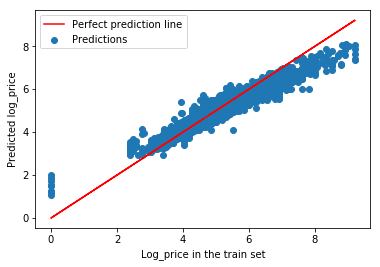

In [130]:
plt.scatter(y_train,forest_predictions, label='Predictions')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.xlabel("Log_price in the train set")
plt.ylabel("Predicted log_price")
plt.legend()

The predictions are great for the middle prices but started getting worse for the high price data. This might have happened because we had a very skewed dataset to begin with. It seems the skewedness in the dataset even after logarithmic normalization still hurts us.

Let's get the cross validation score on the random forest model to see if we are overfitting again. This time cross validation happeend across 5 folds to reduce run time.

In [131]:
#performing 5fold validation
scores=cross_val_score(forest_reg, X_train_prepd, y_train, scoring = "neg_mean_squared_error",cv=5)

# skleanr's cross validation expect a utility function, so the greater the better. 
# That is why putting a negative sign
forest_rmse_scores=np.sqrt(-scores)
print("Scores:", forest_rmse_scores)
print("Mean: %.3f" % forest_rmse_scores.mean())
print("STD: %.3f" % forest_rmse_scores.std())

KeyboardInterrupt: 

We can see that the difference between training set RMSE and validation set RMSE got much smaller than when we had used DecisionTree model WITHOUT pruning but still the training set RMSE is much smaller than the validation set RMSE (still overfitting). 

We can try keep tuning the hyperparameters to make this better but let's move on for now and evaluate our random forest system on the test set.

Now I want to take a look at how each feature affected random forest modeling, a.k.a feature importances.

In [ ]:
#to show the pair of tuples in feature_importances
for feature in zip(X_train.columns, forest_reg.feature_importances_):
    print(feature)

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, forest_reg.feature_importances_):
    feats[feature] = importance #add the name/value pair 

In [ ]:
#creating a dataframe from 'feats' dict. Setting dict keys as an index and renaming name of the importance value column
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature importance'})
#sort the importance value by an descending order and create a bar plot
importances.sort_values(by='Feature importance',ascending=False).plot(kind='bar')

We can see that the neighbourhood and neighbourhood_group were the two most important features in random forest modeling. The number_of_reivews feature was the 3rd highest although our violin plot in the EDA section for this feature did not reveal significant importance of it.

### 4.3.1 Evaluate on the test set

Let's transform the test set. One thing to be careful is that we should NOT fit_transform the test set because the whole point of ML is to train the model so that it can make good predictions on test set. We don't want the model to cheat by optimizing the model to the test set.

In [ ]:
#Do NOT fit the test data. Only transform using the pipeline
X_test_prepd=full_pipeline.transform(X_test)

In [ ]:
#Making predictions using random forest model trained above
final_predictions = forest_reg.predict(X_test_prepd)
print("Log_price from Data Set:" )
print(y_test)
print("Log_price from Prediction: ")
print(final_predictions)
#getting mse and rmse values
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

print("Mean squared error: %.3f" % final_mse)
print("Root mean squared error: %.3f" % final_rmse)

In [ ]:
X_test.head()

As we expected because we were overfitting our training dataset with the RandomForest model, the predictions on the test dataset are not great and the rmse got much larger. Let's compare the predictions and test set labels.

In [ ]:
groups = X_test['neighbourhood_group']
groups = np.unique(X_test['neighbourhood_group'])
print(groups)

In [ ]:
#groups = np.unique(X_test['neighbourhood_group'])
plt.scatter(y_test,final_predictions, label='Predictions')
"""
for g in groups:
    plt.scatter(y_test,final_predictions, label=g)
    #ix = np.where(group == g)
    #ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)

groups = X_test.groupby('neighbourhood_group')
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=12, label=name)
    plt.scatter(y_test,final_predictions, label=name)
"""
plt.plot(y_test,y_test,'r',label='Perfect prediction line')    
plt.xlabel("Log_price in the test set")
plt.ylabel("Predicted log_price")
plt.legend()

We can see that the model performed not as great as it did on the training set.

What about the DecisionTreeModel WITH pruning? (original pruning of max depth = 15)

In [ ]:
#making predictions on the test set using the Decision tree model with pruning
final_predictions_tree = tree_reg.predict(X_test_prepd)
print("Log_price from Data Set:" )
print(y_test)
print("Log_price from Prediction: ")
print(final_predictions_tree)
#getting mse and rmse values
final_mse_tree = mean_squared_error(y_test,final_predictions_tree)
final_rmse_tree = np.sqrt(final_mse_tree)

print("Mean squared error: %.3f" % final_mse_tree)
print("Root mean squared error: %.3f" % final_rmse_tree)

Hmm. It is still worse than the random forest model.

In [ ]:
plt.scatter(y_test,final_predictions_tree, label='Predictions')
plt.plot(y_test,y_test,'r',label='Perfect prediction line')
plt.xlabel("Log_price in the test set")
plt.ylabel("Predicted log_price")
plt.legend()

# 5. Conclusion

In conclusion, the random forest model was better than liner regression and decision tree model in terms of predicting on both train and test sets. Decision tree model without pruining definitely overfitted too much. However even the random forest model could not make outstanding predictions across all datasets mainly because (1) the data was highly skewed so that we don't have enough low and high price AirBnB data and (2) hyperparameter tuning was not performed. At least visualization showed us that the neighbourhood was a importnat factor in setting a price. Other models such as support vector machine or neural networks could be worth trying. Hope you enjoyed my project.